<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [9]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



203
196
203
142


'--------------------Write your code above this line------------------------------'

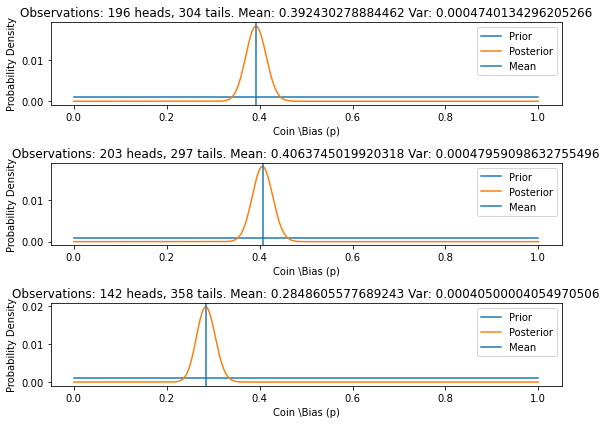

In [50]:
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
from scipy.stats import beta

'''--------------------Write your code below this line------------------------------'''

exp=[]
var=[]
M=0
json_file_path="problem_1/dataset_1.json"
with open(json_file_path,'r') as json_file:
    boolean_list_out1=json.load(json_file)

for element in boolean_list_out1:
    if element:
        M=M+1



A=0
json_file_path2="dataset_2.json"
with open(json_file_path2,'r') as json_file2:
    boolean_list_out2=json.load(json_file2)

for element in boolean_list_out2:
    if element:
        A=A+1
n=500
print(A)


C=0


json_file_path3="dataset_3.json"
with open(json_file_path3,'r') as json_file3:
    boolean_list_out3=json.load(json_file3)

for element in boolean_list_out3:
    if element:
        C=C+1
        
def find_P(x,N):
    comb=math.comb(N,x)
    return (comb*(.5**(x))*((.5)**(N-x)))

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

def easyfun(M,i):
    # Parameters for the prior Beta distribution
    alpha_prior = 1  # Prior success (heads)
    beta_prior = 1   # Prior failure (tails)
    test=np.ones(1000)
    test/=np.sum(test)
# Define the number of coin flips and observed outcomes
    num_flips = 500
    observed_data = [M, num_flips-M]  # Number of heads and tails observed

# Create a range of possible bias values (p) for the coin
    bias_values = np.linspace(0, 1, 1000)

# Create subplots for different observed data outcomes
    #fig, axs = plt.subplots(3, 1, figsize=(8, 6))


    # Update the posterior distribution using Bayes' theorem
    print(M)
    alpha_posterior = alpha_prior + M
    beta_posterior = beta_prior + (num_flips - M)

    # Calculate the posterior distribution using the Beta distribution
    posterior = beta(alpha_posterior, beta_posterior).pdf(bias_values)
    posterior/=np.sum(posterior)
    #like=find_P(M,500)
    posterior_mean = np.sum(bias_values * posterior) / np.sum(posterior)
    posterior_variance=(np.sum(posterior*(bias_values-posterior_mean)**2))/( np.sum(posterior))
    var.append(posterior_variance)
    exp.append(posterior_mean)
    # Plot the prior and posterior distributions
    #axs[i].plot(bias_values, beta(alpha_prior, beta_prior).pdf(bias_values), label='Prior', linestyle='--')
    axs[i].plot(bias_values,test, label='Prior')
    axs[i].plot(bias_values, posterior, label='Posterior')
    axs[i].axvline(posterior_mean, label='Mean')
    axs[i].set_title(f'Observations: {M} heads, {num_flips - M} tails. Mean: {posterior_mean} Var: {posterior_variance}')
    axs[i].set_xlabel('Coin \Bias (p)')
    axs[i].set_ylabel('Probability Density')
    axs[i].legend()
numheads=[M,A,C]
for i, stage in enumerate(numheads):
    easyfun(stage,i)
plt.tight_layout()

'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

/var/folders/gr/k6p8k2jd27s0_5wbw04x_bv00000gn/T/ipykernel_1151/1470882293.py:19: DeprecationWarning: Using factorial() with floats is deprecated
  output.append(np.log(math.factorial(element)))


'--------------------Write your code above this line------------------------------'

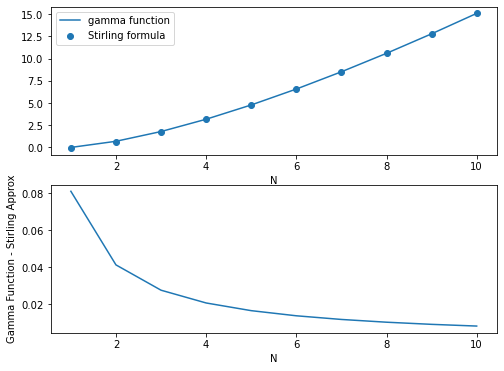

In [62]:

'''--------------------Write your code below this line------------------------------'''
def stirling(n):
    y=np.log(math.factorial(n))
    x=(n*np.log(n))-n+((1/2)*np.log(2*np.pi*n))
    return [x,y]


fig, axs = plt.subplots(2, 1, figsize=(8, 6))  
blank=[]
blank2=[]
for i in range(10):
    blank.append(stirling(i+1)[0])
    blank2.append(stirling(i+1)[1])
axs[0].scatter(np.linspace(1,10,10),blank,label='Stirling formula')

random=np.linspace(1,10,10)
output=[]
for element in random:
    output.append(np.log(math.factorial(element)))
axs[0].plot(random,output,label='gamma function')
axs[0].set_xlabel('N')
axs[0].set_ylabel('')
axs[1].plot(random,np.subtract(output,blank))
axs[1].set_xlabel('N')
axs[1].set_ylabel('Gamma Function - Stirling Approx')
axs[0].legend()
'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br> p=M/N is the solution.
<br> 
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1:** .392<br> **Data set 2:** .406<br>**Data set 3:** .284
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

500
500
500


'--------------------Write your code above this line------------------------------'

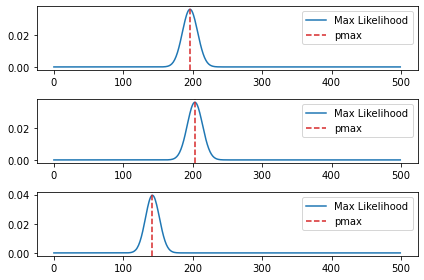

In [63]:


'''--------------------Write your code below this line------------------------------'''
from scipy.stats import binom
fig, axs = plt.subplots(3,1)
def find_MLE(M,i):
    bias_values=np.linspace(0,1,1000)
    likelihood=binom.pmf(M,500,bias_values)
    mle_estimate=bias_values[np.argmax(likelihood)]
    heads_arr=np.arange(500)
    max_likelihood_fuc=binom.pmf(heads_arr, 500, mle_estimate)
    true_likelihood_fuc=binom.pmf(heads_arr, 500, .5)
    print(len(max_likelihood_fuc))
    axs[i].plot(heads_arr,max_likelihood_fuc, label='Max Likelihood')
    axs[i].axvline(x=M, color='tab:red', linestyle='--', label='pmax')
    #axs[i].plot(heads_arr,true_likelihood_fuc,label='likelihood')
    axs[i].legend()
numheads=[196,203,142]
for i, head in enumerate(numheads):
    find_MLE(head,i)
plt.tight_layout()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

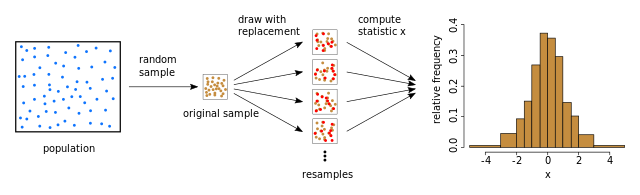
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



[0.37649402390438236, 0.3994673768308921, 0.3845577211394303, 0.3997000999666777, 0.3885803154854473, 0.3930142647646981, 0.39662889248643, 0.39347376841543935, 0.3921803909804519, 0.40438247011952183, 0.3974700399467377, 0.40179910044977496, 0.4026991002999001, 0.40313263719173503, 0.4026796427143047, 0.41048471574135803, 0.4048730084661021, 0.40550472476376215, 0.26294820717131473, 0.2982689747003995, 0.2861069465267365, 0.28240586471176293, 0.278715840924239, 0.279296093854153, 0.27983049233406393, 0.28494767015532296, 0.2847357632118395]
[0.00046669239337707424, 0.0001596095753018882, 5.912392711753213e-05, 3.9970003340548316e-05, 2.6389609452704284e-05, 1.5900423412394576e-05, 1.1394296725773153e-05, 7.954276638483084e-06, 5.958926378294131e-06, 0.00047884152679832196, 0.00015933972541016378, 6.004411274732026e-05, 4.006872145886217e-05, 2.672628168639125e-05, 1.603204346182773e-05, 1.152154520230762e-05, 8.030892093513428e-06, 6.026314100393317e-06, 0.0003853010885023977, 0.00013

'--------------------Write your code above this line------------------------------'

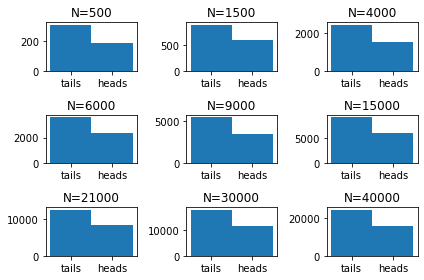

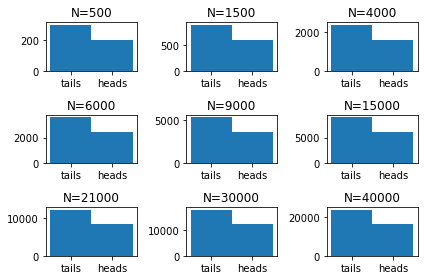

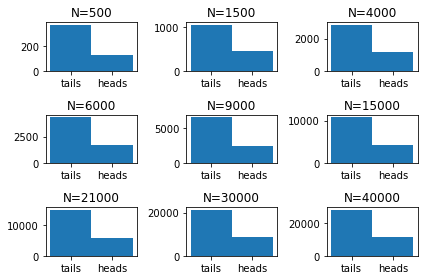

In [170]:
'''--------------------Write your code below this line------------------------------'''
import random
expectation_values=[]
variances=[]
fig, axs = plt.subplots(3,3)
dataset=[boolean_list_out1,boolean_list_out2,boolean_list_out3]
def bootstrap(N,i,j,dat):
    data=[]
    num_heads=0
    for num in range(100):
        y = random.sample(dat, N)
        for nu in range(N):
            data.append(y[nu])
    for ind,element in enumerate(data):
        if element:
            data[ind]=1
            num_heads+=1
        else:
            data[ind]=0
    bias_values=np.linspace(0,1,1000)
    prior=np.ones(1000)
    prior/=len(prior)
    #print(num_heads)
    likelihood = binom.pmf(num_heads, N*100, bias_values) # comb(n, observed_heads) *(bias_values ** observed_heads) * ((1 - bias_values) ** observed_tails)
            # Update the posterior distribution by multiplying the prior and likelihood
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalize to make it a proper probability distribution

    posterior_mean = np.sum(bias_values * posterior) / np.sum(posterior)
    posterior_variance=(np.sum(posterior*(bias_values-posterior_mean)**2))/( np.sum(posterior))
    expectation_values.append(posterior_mean)
    variances.append(posterior_variance)
    #print(type(data))
    axs[i,j].hist(data, bins = [0, .5, 1])
    x = ['tails','heads']
    axs[i,j].set_xticks([.25,.75])
    #axs[i,j].set_yticks([100,250])
    axs[i,j].set_xticklabels(x)
    axs[i,j].set_title(f'N={N*100}')
#bootstrap(5)

vals=[[5,15,40],[60,90,150],[210,300,400]]

for i, val in enumerate(vals):
    for j, v in enumerate(val):
        bootstrap(v,i,j,dataset[0])
plt.tight_layout()
fig2, axs = plt.subplots(3,3)        
vals=[[5,15,40],[60,90,150],[210,300,400]]
for i, val in enumerate(vals):
    for j, v in enumerate(val):
        bootstrap(v,i,j,dataset[1])
plt.tight_layout()

fig3, axs = plt.subplots(3,3)
vals=[[5,15,40],[60,90,150],[210,300,400]]
for i, val in enumerate(vals):
    for j, v in enumerate(val):
        bootstrap(v,i,j,dataset[2])

plt.tight_layout()
print(expectation_values)
print(variances)
'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

[0.392430278884462, 0.392430278884462, 0.392430278884462, 0.392430278884462, 0.392430278884462, 0.392430278884462, 0.392430278884462, 0.392430278884462, 0.392430278884462]


'--------------------Write your code above this line------------------------------'

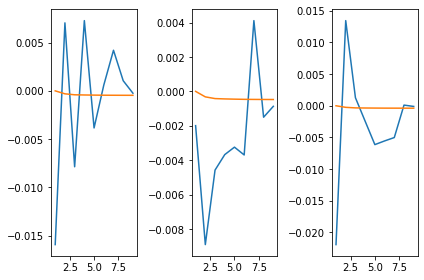

In [197]:


'''--------------------Write your code below this line------------------------------'''
fig, axs = plt.subplots(1,3)

e1=[]
e2=[]
e3=[]
v1=[]
v2=[]
v3=[]
for i in range(27):
    if i < 9:
        e1.append(expectation_values[i])
    if i >17:
        e3.append(expectation_values[i])
    if i>8 and i<18:
        e2.append(expectation_values[i])
        
for i in range(27):
    if i < 9:
        v1.append(variances[i])
    if i >17:
        v3.append(variances[i])
    if i>8 and i<18:
        v2.append(variances[i])
c1=[]
c2=[]
c3=[]
f1=[]
f2=[]
f3=[]
for i in range(9):
    c1.append(exp[0])
    c2.append(exp[1])
    c3.append(exp[2])
    f1.append(var[0])
    f2.append(var[1])
    f3.append(var[2])
print(c1)
arrr=np.linspace(1,9,9)
axs[0].plot(arrr,np.subtract(e1,c1))
axs[0].plot(arrr,np.subtract(v1,f1))
axs[1].plot(arrr,np.subtract(e2,c2))
axs[1].plot(arrr,np.subtract(v2,f2))
axs[2].plot(arrr,np.subtract(e3,c3))
axs[2].plot(arrr,np.subtract(v3,f3))
plt.tight_layout()
'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [65]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self,decay_constant):
        self.decay_constant=decay_constant
        pass

    def pdf_decay(self):
        random_numbers=[]
        random_numbers = np.random.uniform(1, 20, 10000)
        random_numbers=np.sort(random_numbers)
        probd=[]
        for i in random_numbers:
            probd.append((1/self.decay_constant)*np.exp((1-i)/self.decay_constant))
        #plt.plot(random_numbers,probd)
        self.random_numbers=random_numbers
        self.probd=probd
        pass
    
    



'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

'--------------------Write your code above this line------------------------------'

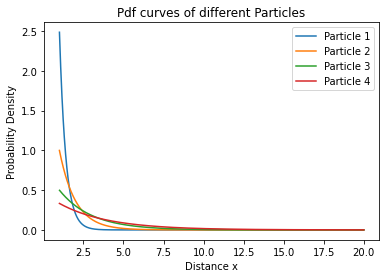

In [67]:


'''--------------------Write your code below this line------------------------------'''
def plot1(self):
    plt.plot(self.random_numbers,self.probd,label='Particle 1')
    plt.legend()
    pass
    
def plot2(self):
    plt.plot(self.random_numbers,self.probd,label='Particle 2')
    plt.legend()
    pass
def plot3(self):
    plt.plot(self.random_numbers,self.probd,label='Particle 3')
    plt.legend()
    pass
def plot4(self):
    plt.plot(self.random_numbers,self.probd,label='Particle 4')
    plt.legend()
    pass
Particle.plot1=plot1
Particle.plot2=plot2
Particle.plot3=plot3
Particle.plot4=plot4


one=Particle(.4)
two=Particle(1)
three=Particle(2)
four=Particle(3)
one.pdf_decay()
one.plot1()
two.pdf_decay()
two.plot2()
three.pdf_decay()
three.plot3()
four.pdf_decay()
four.plot4()
plt.title('Pdf curves of different Particles')
plt.xlabel('Distance x')
plt.ylabel('Probability Density')
'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

'--------------------Write your code above this line------------------------------'

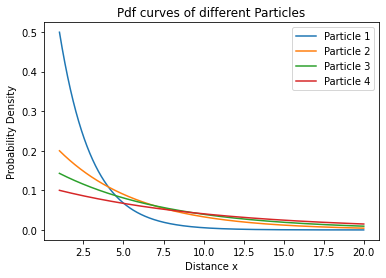

In [68]:

'''--------------------Write your code below this line------------------------------'''
def fixed_x(self):
    random_numbers=[]
    random_numbers = np.random.uniform(1, 20, 10000)
    random_numbers=np.sort(random_numbers)
    probd=[]
    for i in random_numbers:
        probd.append((1/i)*np.exp((1-self.decay_constant)/i))
        #plt.plot(random_numbers,probd)
    self.random_numbers=random_numbers
    self.probd=probd
    pass
Particle.fixed_x=fixed_x

p1=Particle(2)
p2=Particle(5)
p3=Particle(7)
p4=Particle(10)
p1.pdf_decay()
p1.plot1()
p2.pdf_decay()
p2.plot2()
p3.pdf_decay()
p3.plot3()
p4.pdf_decay()
p4.plot4()
plt.title('Pdf curves of different Particles')
plt.xlabel('Distance x')
plt.ylabel('Probability Density')
'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


'--------------------Write your code above this line------------------------------'

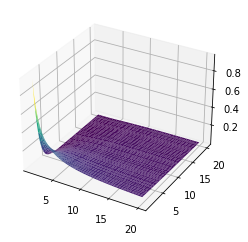

In [34]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''
def surface_plot(self,file_path):
    random_numbers=[]
    random_numbers = np.random.uniform(1, 20, 500)
    random_numbers=np.sort(random_numbers)
    random_numbers2=[]
    random_numbers2 = np.random.uniform(1, 20, 500)
    random_numbers2=np.sort(random_numbers2)
    probd=[]
    for i in random_numbers:
        for j in random_numbers2:
            probd.append((1/i)*np.exp((1-j)/i))
        #plt.plot(random_numbers,probd)
    random_numbers,random_numbers2=np.meshgrid(random_numbers,random_numbers2)
    z=((1/random_numbers)*np.exp((1-random_numbers2)/random_numbers))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(random_numbers,random_numbers2,z, cmap='viridis')
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    pass

Particle.surface_plot=surface_plot
test=Particle(1)
test.surface_plot('surface.png')  #just a test to see if this works

'''--------------------Write your code above this line------------------------------'''

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




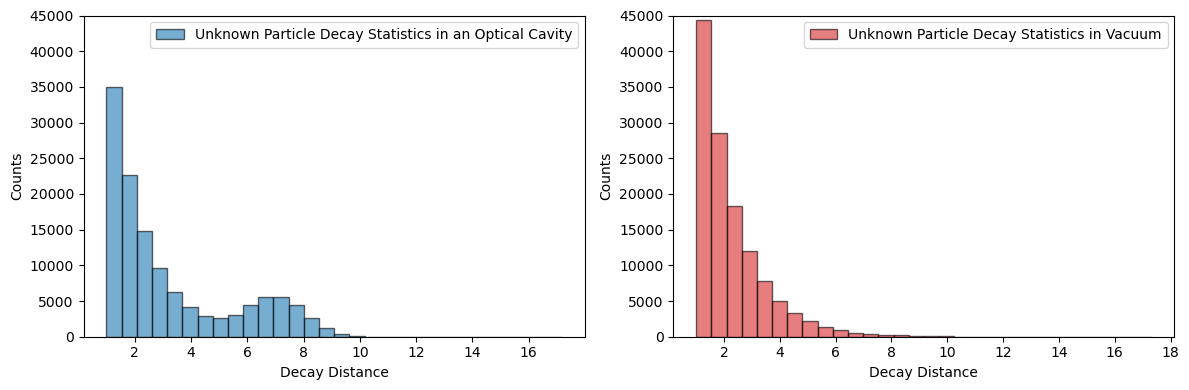

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

In [32]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import expon
import json 
'''--------------------Write your code below this line------------------------------'''

json_file1 = 'Downloads/Vacuum_decay_dataset.json'
json_file2 = 'Downloads/Cavity_decay_dataset.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file1, 'r') as json_file:
    vacdata = json.load(json_file)
with open(json_file2, 'r') as json_file2:
    cavdata = json.load(json_file2)

data = vacdata
data2= cavdata
# Define the Gaussian PDF function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
def exponential_pdf(x, rate):
    return rate * np.exp(-rate * x)
# Perform the curve fitting
#bins, edges = np.histogram(data, bins=20, density=True)
#x_range = (edges[:-1] + edges[1:]) / 2
#popt, _ = curve_fit(gaussian, x_range, bins, p0=[1, np.mean(data), np.std(data)], maxfev=1000000)
#print(popt)
# Plot the data and the fitted Gaussian
#plt.hist(data,28, density=True, alpha=0.5, label='Data Histogram')
#x_range = np.linspace(min(data), max(data), len(data))
#plt.plot(x_range, gaussian(x_range, *popt), 'r', label='Fitted Gaussian')
#plt.legend()
particle1decay=popt
# Perform the curve fitting
bins, edges = np.histogram(data, bins=20, density=True)
x_range = (edges[:-1] + edges[1:]) / 2
p0 = [1]  # Initial guess for the rate parameter
popt, _ = curve_fit(exponential_pdf, x_range, bins, p0=p0)
print(popt)
# Plot the data and the fitted exponential PDF
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
x_range = np.linspace(0, max(data), 1000)
plt.plot(x_range, exponential_pdf(x_range, *popt), 'r', label='Fitted Exponential PDF')
plt.legend()

# Customize the plot
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Exponential PDF Fitting')

# Display or save the plot
#plt.show()

# Customize the plot
#plt.xlabel('X')
#plt.ylabel('Probability Density')
#plt.title('Gaussian Fitting')

# Display or save the plot
#plt.show()

# Generate or load your data
parse = np.sort(cavdata)

b=[]
for element in parse:
    if element >= 4.4:
        b.append(element)
data2=np.array(b)

bins, edges = np.histogram(data2, bins=20, density=True)
x_range = (edges[:-1] + edges[1:]) / 2
popt, _ = curve_fit(gaussian, x_range, bins, p0=[1, np.mean(data2), np.std(data2)], maxfev=1000000)
#sigma1=sqrt(2*np.pi)/popt[0]
particle2mean=popt[1]
particle2var=popt[2]

plt.hist(data2,28, density=True, alpha=0.5, label='Data Histogram')
x_range = np.linspace(min(data2), max(data2), len(data2))
plt.plot(x_range, gaussian(x_range, *popt), 'r', label='Fitted Gaussian')
plt.legend()

print(popt)
plt.close('all')

'''--------------------Write your code above this line------------------------------'''

[0.59203467]
[1.04498441 6.72760994 1.31167673]


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
1. Substituting P: $$M(t|\ \lambda) \sim \int dx e^{t x} e^{((1-x)/\lambda)} 1/\lambda$$
2. Take non-x-dependent terms outside integral: $$M(t|\ \lambda) \sim (1/\lambda) e^{1/\lambda} \int dx e^{x(t\lambda-1)}$$
3. Compute the integral: $$M(t|\ \lambda) \sim (1/(t\lambda-1)) e^{1/\lambda} e^{x(t\lambda-1)} +C$$
4. Simplify: $$M(t|\ \lambda) \sim (1/(t\lambda-1)) e^{tx+((1-x)/\lambda)} +C$$
'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
1. Isolate t from other constants: $$M(t|\ \lambda) \sim (1/(t\lambda-1)) e^{tx}e^{((1-x)/\lambda)} +C$$
2. Use the quotient rule to differentiate: $$M(t|\ \lambda) \sim e^{tx}((t\lambda-1)d/d\lambda(e^{(1-x)/\lambda}) -e^{(1-x)/\lambda}t)/(t\lambda-1)^2$$
3. Compute the derivative: $$ d/d\lambda(e^{(1-x)/\lambda}) = (x-1)/(\lambda^2)*e^{(1-x)/\lambda} $$
4. Sub back into expression: $$M(t|\ \lambda) \sim e^{tx}((t\lambda-1)(x-1)/(\lambda^2)*e^{(1-x)/\lambda} -e^{(1-x)/\lambda}t)/(t\lambda-1)^2$$
5. Substitute 0 for t: Mean= $$ (1-x)e^{(x-1)/\lambda}/\lambda^2 $$


1. In order to solve for the variance we must take the second derivative of the MGF with respect to t.

2. After we must evaluate at t=0

3. Due to time used integral calculator and evaluated at t=0 to get: $$e^{(1-x)/\lambda}((-2x+2)\lambda+x^2-2x+1)/\lambda^4$$
'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

None


'--------------------Write your code above this line------------------------------'

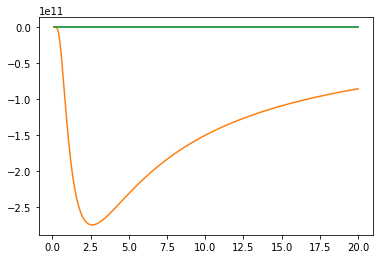

In [75]:


'''--------------------Write your code below this line------------------------------'''
def central_difference(f,t, x,lambd, h):
    return (f(t+h,x,lambd) - f(t-h,x,lambd)) / (2 * h)

def f1(t,x,lambd):
    return (1/((t*lambd)-1))*np.exp(t*x+((1-x)/lambd))  
x=np.linspace(1,500,1000)
lambd=np.linspace(.1,20,1000)
t=np.zeros(1000)
h=[]
for i in range(1000):
    h.append(.0001)
h=np.array(h)
derivative = central_difference(f1,t, x,lambd, h)
#print(derivative)
def analytical(x,lamd):
    return (1-x)*np.exp((x-1)/lambd)/(lambd**2)
derivative2=analytical(x,lambd)

plt.plot(lambd,derivative)
plt.plot(lambd,derivative2)

def central_difference_second_derivative(f,t, x,lambd, h):
    return (f(t - h,x,lambd) - 2 * f(t,x,lambd) + f(t + h,x,lambd)) / (h**2)
sder1=central_difference_second_derivative(f1,t,x,lambd,h)
def analytical2(x,lambd):
    np.exp((1-x)/lambd)*(((-2*x+2)*lambd)+(x**2)-(2*x)+1)/(lambd**4)
sder2=analytical2(x,lambd)
print(sder2)
plt.plot(lambd,sder1)

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
1. By using the given summation information we can use the fact to substitute: $$ M(t) = \sum_{x=0}^{n} e^{tx}*(p+1-p)^n = \sum_{x=0}^{n} e^{tx}  $$
'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
1. Taking the first derivative with respect to t we get: $$d/dt(\sum_{x=0}^{n} e^{tx})= \sum_{x=0}^{n} xe^{tx} $$
2. Evaluated at t=0: mean= x$$$$


1. Taking the second derivative with respect to t we get: $$d^2/dt^2(\sum_{x=0}^{n} e^{tx})= \sum_{x=0}^{n} x^2e^{tx} $$
2. Evaluated at t=0: mean=x^2
'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

In [2]:


'''--------------------Write your code below this line------------------------------'''

####doesn't seem like I am doing this right but what I would do if I was on the right track is similar to the previous
#problem but with summations



'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'